# Assignment 3

This notebook includes:
- Sampling and descriptive statistics of Glucose
- 98th percentile analysis for BMI
- Bootstrap analysis for BloodPressure

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Task 1: Sampling and Descriptive Statistics – Glucose

- Take a sample of 25 records
- Compare mean and max with the full dataset
- Plot distributions

Population Mean: 120.89453125
Sample Mean: 116.64
Population Max: 199
Sample Max: 183


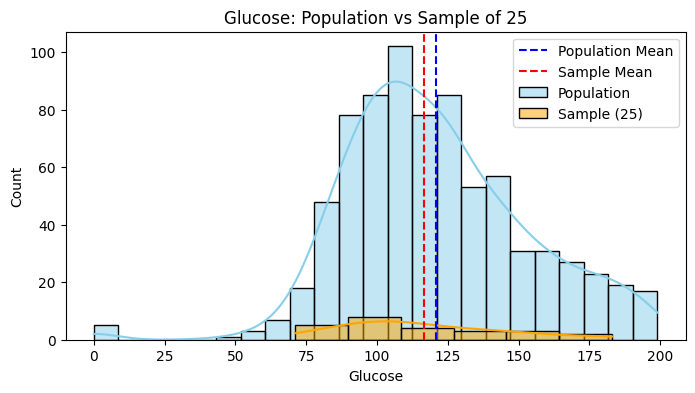

In [4]:
np.random.seed(42)
sample_25 = df.sample(n=25)

print("Population Mean:", df['Glucose'].mean())
print("Sample Mean:", sample_25['Glucose'].mean())
print("Population Max:", df['Glucose'].max())
print("Sample Max:", sample_25['Glucose'].max())

plt.figure(figsize=(8, 4))
sns.histplot(df['Glucose'], label='Population', color='skyblue', kde=True)
sns.histplot(sample_25['Glucose'], label='Sample (25)', color='orange', kde=True)
plt.axvline(df['Glucose'].mean(), color='blue', linestyle='--', label='Population Mean')
plt.axvline(sample_25['Glucose'].mean(), color='red', linestyle='--', label='Sample Mean')
plt.legend()
plt.title("Glucose: Population vs Sample of 25")
plt.show()

### Task 2: 98th Percentile of BMI

- Calculate and compare the 98th percentile of BMI for sample vs population
- Visualize it

Population 98th Percentile (BMI): 47.52599999999996
Sample 98th Percentile (BMI): 40.248


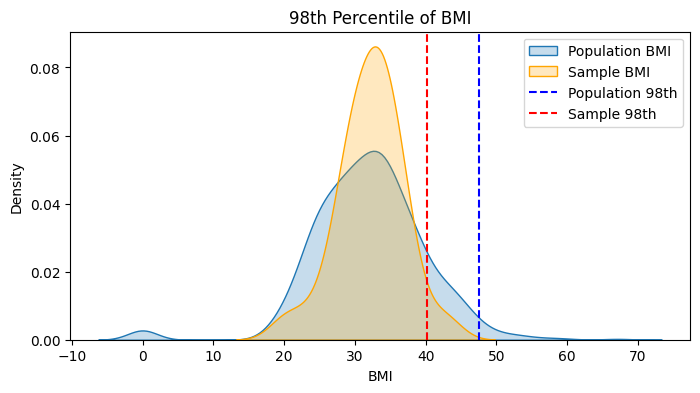

In [5]:
pop_bmi_98 = np.percentile(df['BMI'], 98)
samp_bmi_98 = np.percentile(sample_25['BMI'], 98)

print("Population 98th Percentile (BMI):", pop_bmi_98)
print("Sample 98th Percentile (BMI):", samp_bmi_98)

plt.figure(figsize=(8, 4))
sns.kdeplot(df['BMI'], label='Population BMI', fill=True)
sns.kdeplot(sample_25['BMI'], label='Sample BMI', fill=True, color='orange')
plt.axvline(pop_bmi_98, color='blue', linestyle='--', label='Population 98th')
plt.axvline(samp_bmi_98, color='red', linestyle='--', label='Sample 98th')
plt.legend()
plt.title("98th Percentile of BMI")
plt.show()

### Task 3: Bootstrap Analysis – BloodPressure

- Generate 500 bootstrap samples (n=150)
- Compute mean, std, and 98th percentile for each
- Compare with population statistics

Bootstrap Avg Mean: 69.18 vs Pop Mean: 69.11
Bootstrap Avg Std: 19.08 vs Pop Std: 19.36
Bootstrap Avg 98th Pct: 97.92 vs Pop 98th Pct: 99.32


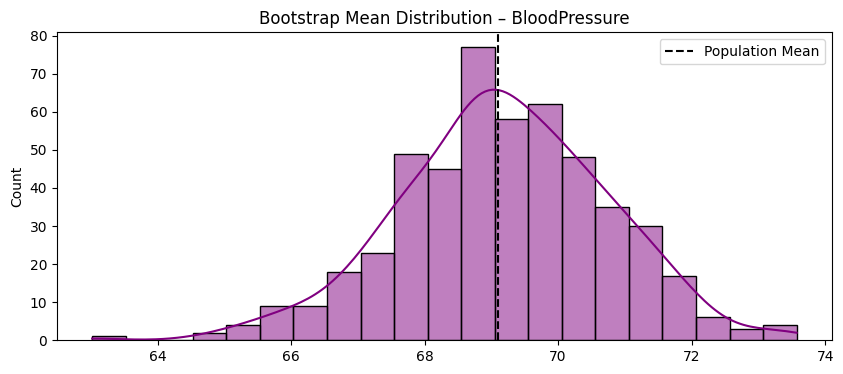

In [6]:
bootstrap_means = []
bootstrap_stds = []
bootstrap_pcts = []

for _ in range(500):
    bs_sample = df.sample(n=150, replace=True)
    bootstrap_means.append(bs_sample['BloodPressure'].mean())
    bootstrap_stds.append(bs_sample['BloodPressure'].std())
    bootstrap_pcts.append(np.percentile(bs_sample['BloodPressure'], 98))

mean_avg = np.mean(bootstrap_means)
std_avg = np.mean(bootstrap_stds)
pct_avg = np.mean(bootstrap_pcts)

pop_mean = df['BloodPressure'].mean()
pop_std = df['BloodPressure'].std()
pop_pct = np.percentile(df['BloodPressure'], 98)

print(f"Bootstrap Avg Mean: {mean_avg:.2f} vs Pop Mean: {pop_mean:.2f}")
print(f"Bootstrap Avg Std: {std_avg:.2f} vs Pop Std: {pop_std:.2f}")
print(f"Bootstrap Avg 98th Pct: {pct_avg:.2f} vs Pop 98th Pct: {pop_pct:.2f}")

plt.figure(figsize=(10, 4))
sns.histplot(bootstrap_means, kde=True, color='purple')
plt.axvline(pop_mean, color='black', linestyle='--', label='Population Mean')
plt.title('Bootstrap Mean Distribution – BloodPressure')
plt.legend()
plt.show()